<a href="https://colab.research.google.com/github/VoidAutomata/EECS3401/blob/main/3401_Chris_Shi_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/aubroma/datasests/main/titanic-mod-f23.csv"
passengers = pd.read_csv(url, sep=",")

# Backup dataset
data_backup = passengers

In [ ]:
#classification
#drop attr
passengers.drop(labels=['Name'], axis=1, inplace=True)
passengers.drop(labels=['Ticket'], axis=1, inplace=True)
passengers.drop(labels=['PassengerId'], axis=1, inplace=True)
passengers.drop(labels=['Cabin'], axis=1, inplace=True)

passengers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,female,0.17,1,2,20.5750,S
1,0,3,male,0.83,0,1,9.3500,S
2,0,3,male,1.00,5,2,46.9000,S
3,0,2,female,1.00,1,2,41.5792,C
4,0,3,male,1.00,4,1,39.6875,S


In [ ]:
#Imports for pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#split
X = passengers.drop(['Survived'], axis=1)
y = passengers['Survived']

numerical_columns = X.select_dtypes(include='number').columns.to_list()
categorical_columns = X.select_dtypes(exclude='number').columns.to_list()

#simpleimputer
numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocess = ColumnTransformer([
                                ('Numerical', numerical_pipeline, numerical_columns),
                                ('Categorical', categorical_pipeline, categorical_columns)],
                               )
preprocess

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Sex', 'Embarked'])])

In [ ]:
#fit shape
X_prepared = preprocess.fit_transform(X)

#convert dataframe back into pandas
feature_names=preprocess.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared.shape

(1303, 10)

In [ ]:
X_prepared.head()

,Numerical__Pclass,Numerical__Age,Numerical__SibSp,Numerical__Parch,Numerical__Fare,Categorical__Sex_female,Categorical__Sex_male,Categorical__Embarked_C,Categorical__Embarked_Q,Categorical__Embarked_S
0,0.840625,-2.284832,0.482938,1.869595,-0.245708,1.0,0.0,0.0,0.0,1.0
1,0.840625,-2.233559,-0.477777,0.713958,-0.462282,0.0,1.0,0.0,0.0,1.0
2,0.840625,-2.220352,4.325800,1.869595,0.262203,0.0,1.0,0.0,0.0,1.0
3,-0.352550,-2.220352,0.482938,1.869595,0.159544,1.0,0.0,1.0,0.0,0.0
4,0.840625,-2.220352,3.365085,0.713958,0.123046,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

#split 60/40, random=42

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)
print("X_train: ",X_train.shape, "\ny_train: ", y_train.shape, "\nX_test: ", X_test.shape, "\ny_test: ", y_test.shape)

X_train:  (781, 10) 
y_train:  (781,) 
X_test:  (522, 10) 
y_test:  (522,)


# Decision Tree
max_depth=5, random_state=42

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train.values.ravel())

#test
y_predict = clf.predict(X_test)
clf_cl_re = classification_report(y_test, y_predict)
print (clf_cl_re)
#print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       329
           1       0.56      0.45      0.50       193

    accuracy                           0.67       522
   macro avg       0.64      0.62      0.62       522
weighted avg       0.66      0.67      0.66       522



# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf2 = GaussianNB()
clf2.fit(X_train, y_train)

y_predict2 = clf2.predict(X_test)
clf2_cl_re = classification_report(y_test, y_predict2)
print (clf2_cl_re)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       329
           1       0.56      0.63      0.60       193

    accuracy                           0.68       522
   macro avg       0.66      0.67      0.67       522
weighted avg       0.69      0.68      0.69       522



# Support Vector Machine

SVC(kernel='rbf', C=1, gamma=1, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

clf3 = svm.SVC(kernel='rbf', C=1, gamma=1, random_state=42)
clf3.fit(X_train, y_train.values.ravel())
y_predict3 = clf3.predict(X_test)

clf3_cl_re = classification_report(y_test, y_predict3)
print (clf3_cl_re)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       329
           1       0.61      0.50      0.55       193

    accuracy                           0.70       522
   macro avg       0.67      0.66      0.66       522
weighted avg       0.69      0.70      0.69       522



# Most accurate model (as of first run): SVM!
Decision Tree = 0.67<br>
Gaussian Naive Bayes = 0.68<br>
SVM = 0.70

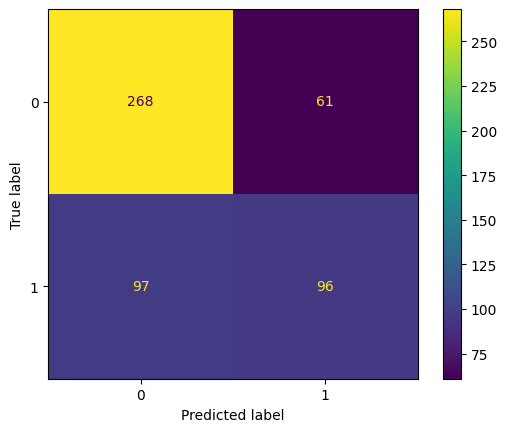

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict3)

In [ ]:
pred_url = "https://raw.githubusercontent.com/aubroma/datasests/main/titanic-new.csv"
pred_passengers = pd.read_csv(pred_url, sep=",")

pred_passengers.drop(labels=['Name'], axis=1, inplace=True)
pred_passengers.drop(labels=['Ticket'], axis=1, inplace=True)
pred_passengers.drop(labels=['PassengerId'], axis=1, inplace=True)
pred_passengers.drop(labels=['Cabin'], axis=1, inplace=True)

#split
X2 = pred_passengers.drop(['Survived'], axis=1)
y2 = pred_passengers['Survived']

numerical_columns = X2.select_dtypes(include='number').columns.to_list()
categorical_columns = X2.select_dtypes(exclude='number').columns.to_list()

#simpleimputer
numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocess2 = ColumnTransformer([
                                ('Numerical', numerical_pipeline, numerical_columns),
                                ('Categorical', categorical_pipeline, categorical_columns)],
                               )
#fit shape
X2_prepared = preprocess2.fit_transform(X2)

#convert dataframe back into pandas
feature_names=preprocess2.get_feature_names_out()
X2_prepared = pd.DataFrame(data=X2_prepared, columns=feature_names)

In [ ]:
#clf3 = svm.SVC(kernel='rbf', C=1, gamma=1, random_state=42)
y_predict4 = clf3.predict(X2_prepared)

print("predictions (0=No, 1=Yes): ", y_predict4)

predictions (0=No, 1=Yes):  [0 0 1 1 0 1]
